# Spatial Plots

#  Figure 1. 

In [56]:
import pandas as pd 

df3 = pd.read_csv('prob_mean_min_max3.csv',delimiter = ',')

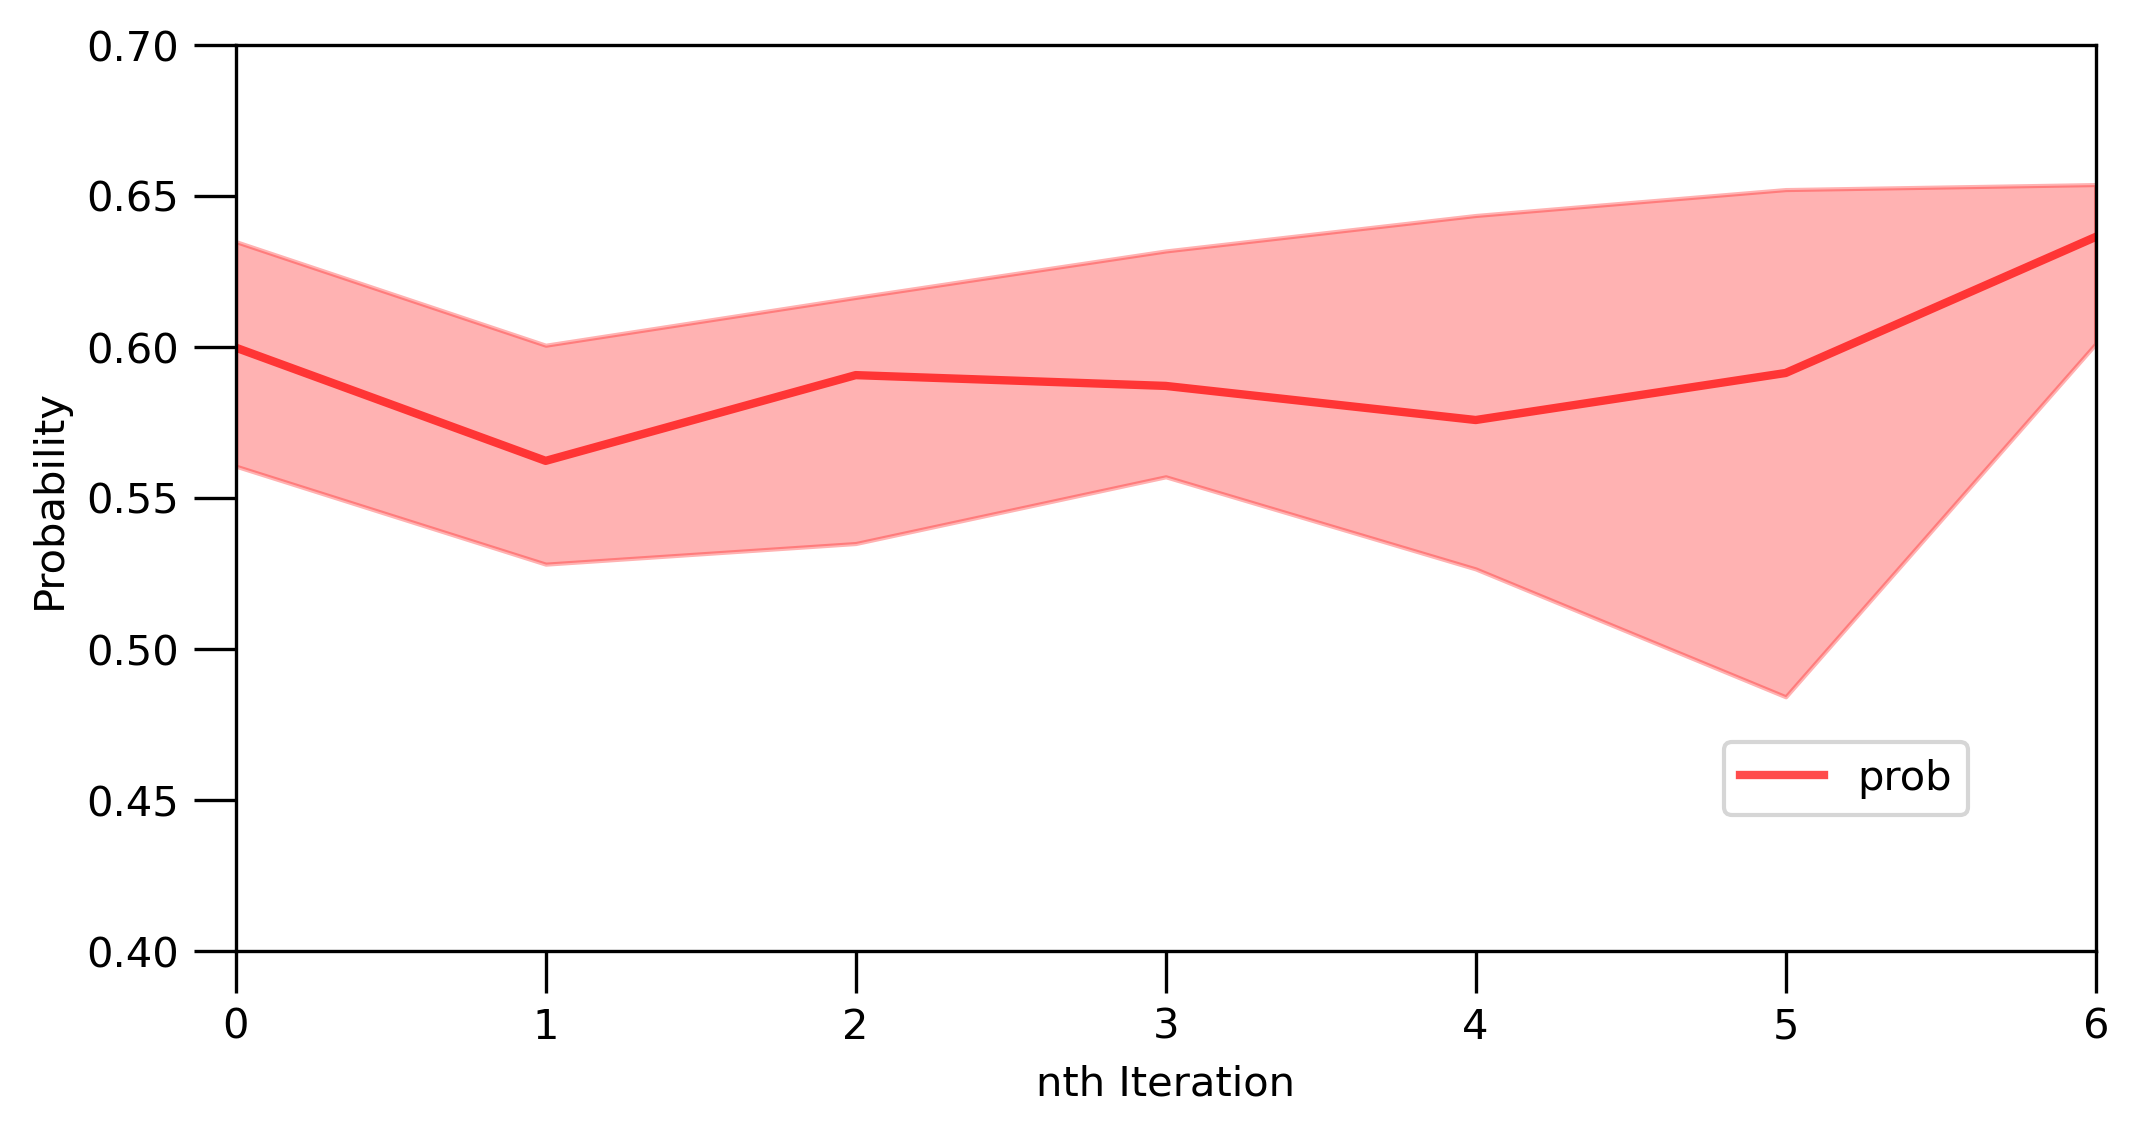

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(3.54,3.54),dpi=300)

plt.plot(df3['Mean'], 'r', linewidth=2, label='prob',alpha=0.7)

plt.fill_between(df3.index, df3['Max'],df3['Min'],  color='red', alpha=0.3)


plt.legend(loc=(0.8, 0.15), fontsize=10)
plt.xlabel("nth Iteration",fontsize=10)
plt.ylabel("Probability",fontsize=10)
plt.ylim(0.4, 0.7)
plt.xlim(0.0, 6.0)
fig.set_facecolor('white')
fig.set_size_inches(8, 4)

plt.grid(False)
plt.tick_params(axis='x',direction='out', length=10)
plt.tick_params(axis='y',direction='out', length=10)
#plt.axhline(y=0.5, color='black',linewidth=1)
#plt.axvline(x=0, color='black',linewidth=1)

plt.show()
fig.savefig('fig15(b).png', bbox_inches='tight')



# Figure 2

In [3]:
import pandas as pd 



df3 = pd.read_csv('prob_mean_min_max_split.csv',delimiter = ',')

,Mean,Max,Min
0,0.617060,0.713504,0.557108
1,0.622345,0.687965,0.557154
2,0.635011,0.695134,0.585435
3,0.604735,0.674057,0.539268
4,0.585617,0.632962,0.535777
5,0.650043,0.718493,0.520472
6,0.621671,0.636334,0.608399


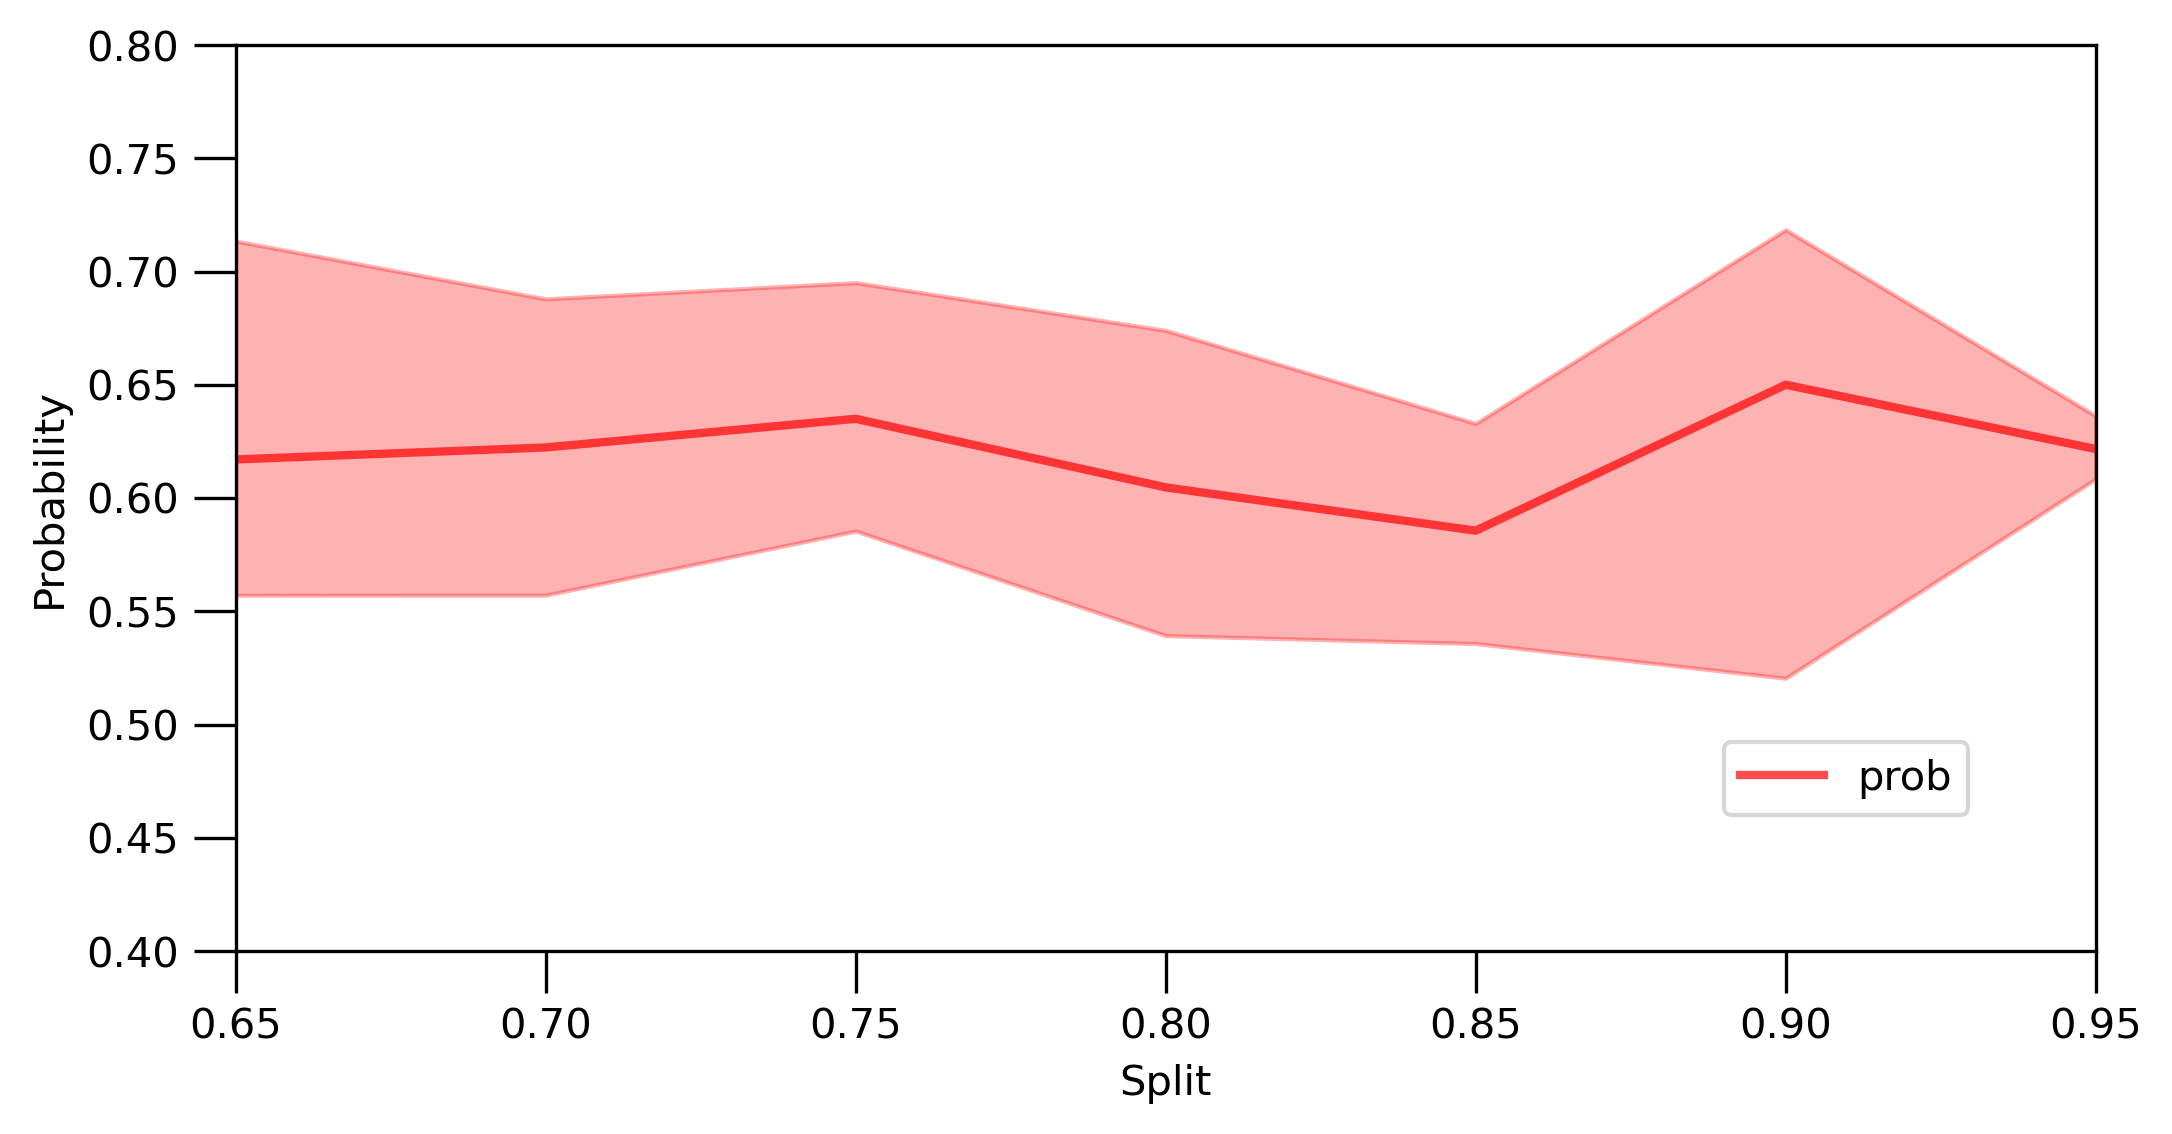

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3.54,3.54), dpi=300)
plt.plot(df1['Mean'], 'k', linewidth=2, label='P_DL',alpha=0.7)
plt.plot(df2['Pred'], 'b', linewidth=2, label='P_NWM',alpha=0.7) 
plt.fill_between(df1.index, df1['Min'],df1['Max'],label='DL_Range',  color='pink', alpha=0.9)
plt.fill_between(df1.index, df2['plus'],df2['minus'],label='NWM_Range',  color='cyan', alpha=0.9)
plt.legend(loc=(0.9, 0.9), fontsize=10)
plt.xlabel("Lead day",fontsize=10)
plt.ylabel("Probability of Capturing Obsflow",fontsize=10)
plt.axhline(y=0, color='k',linewidth=2)
plt.axvline(x=0, color='k',linewidth=2)

plt.legend(loc=(0.75, 0.33), fontsize=10)
plt.xlabel("Forecast lead day",fontsize=10)
plt.ylabel("Prob. of capturing the obs.",fontsize=10)
fig.set_facecolor('white')
fig.set_size_inches(8, 4)
#fig.set_backgroundcolor('white')
plt.grid(False)
plt.tick_params(axis='x',direction='out', length=10)
plt.tick_params(axis='y',direction='out', length=10)
plt.ylim(0, 1.0)
plt.xlim(0, 30)
#plt.axhline(y=0, color='black',linewidth=1)
#plt.axvline(x=df1.index[0], color='black',linewidth=1)

plt.show()
fig.savefig('fig15(d).png', bbox_inches='tight')

# Figure 3

In [61]:
import pandas as pd
import numpy as np
from scipy.stats import sem

std_err =  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
prob_mean = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

df2 = pd.read_csv('prediction_std_stderr_probability_NWM_0-30.csv',delimiter = ',')
for j in range(0,30):
    prob=[0,0,0,0,0]
    for i in range(0,5):

        df4=pd.read_csv("C:/Users/Sathish Akula/python_scripts/NWM_ML_Scripts/new scripts/old_script_rerun/Final_rerun/graph_data/reviewer_Eror_WholeData_abs_iter_%s_lead_%s_iter.csv"%(j,i),delimiter = ',')


        model_flow_2plus = df4['Modelflow']+ 1*(abs(df4['Error']))
        model_flow_2minus= df4['Modelflow']- 1*(abs(df4['Error']))
        obsflow=df4['Obsflow']
        s=obsflow.between(model_flow_2minus,model_flow_2plus)

        prob[i] = s.value_counts()[1]/s.count()
    std_err[j]= sem(prob) 
    prob_mean[j]=np.mean(prob)
    
    
d_x= pd.DataFrame(prob_mean)
d_y=pd.DataFrame(std_err)

df=pd.concat([d_x, d_y], axis=1)
df.columns = ['Mean', 'std_err']

df["plus"]=df["Mean"] +  df["std_err"]
df["minus"]=df["Mean"] -  df["std_err"]

df2["plus"]=df2["Pred"] +  df2["Std_err"]
df2["minus"]=df2["Pred"] -  df2["Std_err"]
#df2["plus"]=df2["Pred"] +  df2["Std"]
#df2["minus"]=df2["Pred"] -  df2["Std"]

df2[df2< 0] = 0
df2[df2>1 ] = 1



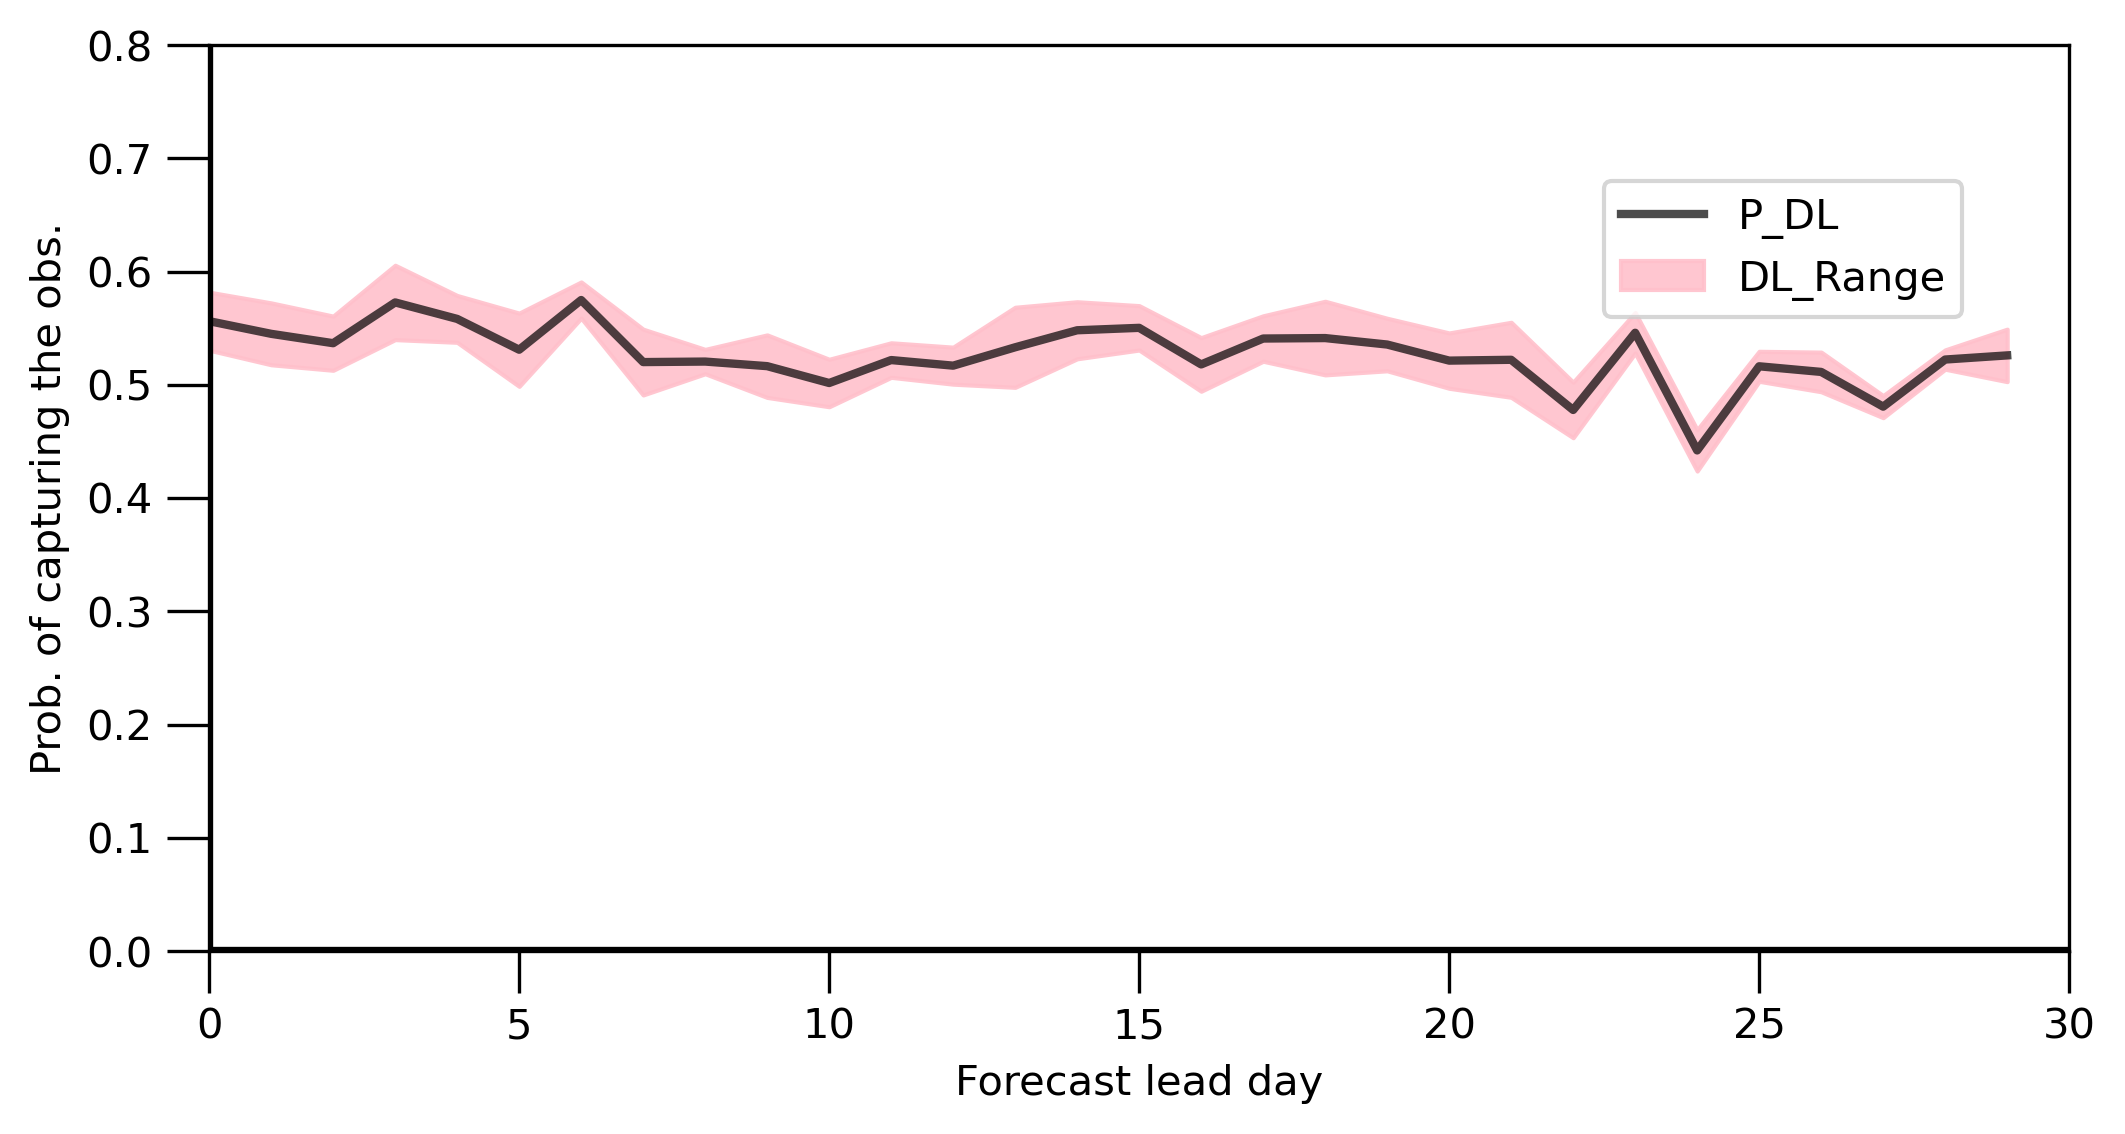

In [64]:

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(3.54,3.54), dpi=300)
plt.plot(df['Mean'], 'k', linewidth=2, label='P_DL',alpha=0.7)
#plt.plot(df2['Pred'], 'b', linewidth=2, label='P_NWM',alpha=0.7) 
plt.fill_between(df.index, df['plus'],df['minus'],label='DL_Range',  color='pink', alpha=0.9)
#plt.fill_between(df.index, df2['plus'],df2['minus'],label='NWM_Range',  color='cyan', alpha=0.9)
plt.legend(loc=(0.9, 0.9), fontsize=10)
plt.xlabel("Lead day",fontsize=10)
plt.ylabel("Probability of Capturing Obsflow",fontsize=10)
plt.axhline(y=0, color='k',linewidth=2)
plt.axvline(x=0, color='k',linewidth=2)

plt.legend(loc=(0.75, 0.7), fontsize=10)
plt.xlabel("Forecast lead day",fontsize=10)
plt.ylabel("Prob. of capturing the obs.",fontsize=10)
fig.set_facecolor('white')
fig.set_size_inches(8, 4)
#fig.set_backgroundcolor('white')
plt.grid(False)
plt.tick_params(axis='x',direction='out', length=10)
plt.tick_params(axis='y',direction='out', length=10)
plt.ylim(0, 0.8)
plt.xlim(0, 30)
#plt.axhline(y=0, color='black',linewidth=1)
#plt.axvline(x=df1.index[0], color='black',linewidth=1)

plt.show()
fig.savefig('fig15(d).png', bbox_inches='tight')

# Figure 4

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("Error_WholeData_abs_station_removed.csv",delimiter = ',') 

df[df< 0] = 0
#df1= dataframe_collection[0][305:801]
df1= df[310:685]
#df1= dataframe_collection[0][675:854]
df1

,Unnamed: 0,Modelflow,Obsflow,Error,NWM_min,NWM_max,ML_1min,ML_1max
310,310,227.721245,240.126863,142.204330,184.429996,261.099994,85.516915,369.925575
311,311,230.199995,214.641700,142.452492,195.669996,252.729994,87.747503,372.652486
312,312,229.039995,162.255533,142.508438,198.799996,261.199994,86.531557,371.548433
313,313,250.550619,168.768408,142.223098,213.819995,289.659993,108.327522,392.773717
314,314,262.597494,156.025827,142.925317,230.769995,285.879994,119.672177,405.522811
...,...,...,...,...,...,...,...,...
680,680,180.700621,106.471345,120.329812,176.449996,187.579996,60.370809,301.030433
681,681,178.176871,158.008006,117.805163,171.449996,183.909996,60.371708,295.982034
682,682,174.890621,156.308995,114.512074,167.929996,187.239996,60.378547,289.402695
683,683,171.851871,119.780263,111.421590,165.619996,177.949996,60.430281,283.273462


In [23]:
import numpy as np
res_ML=df1["Obsflow"].between(df1["ML_1min"],df1["ML_1max"])
count_ML = np.count_nonzero(res_ML)
prob_ML=count_ML/len(df1)
prob_ML = round(prob_ML, 2)


res_NWM=df1["Obsflow"].between(df1["NWM_min"],df1["NWM_max"])
count_NWM= np.count_nonzero(res_NWM)
prob_NWM=count_NWM/len(df1)
prob_NWM = round(prob_NWM, 2)

date_to_omit=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 21, 28, 35, 45, 46, 68, 92, 93, 94, 95, 100, 101, 102, 104, 115, 116, 117, 118, 131, 133, 134, 135, 146, 147, 167, 168, 169, 170, 173, 178, 179, 191, 195, 199, 200, 201, 219, 225, 232, 251, 254, 256, 257, 258, 259, 260, 261, 262, 275, 276, 277, 314, 317, 318, 319, 320, 321, 322, 323, 324, 348, 368, 419, 420,421, 446,452, 453, 454, 456, 457, 480, 508, 624, 625, 626, 700,712, 791, 841, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884,885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898,899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 933,934]
a=pd.date_range(start="2018-12-11",end="2021-08-15").to_list()
print(len(a))

for index in sorted(date_to_omit, reverse=True):
    del a[index]

#b=pd.to_datetime(a[305:801])
b=pd.to_datetime(a[310:685])
#b=pd.to_datetime(a[675:854])
b
df1.index=b

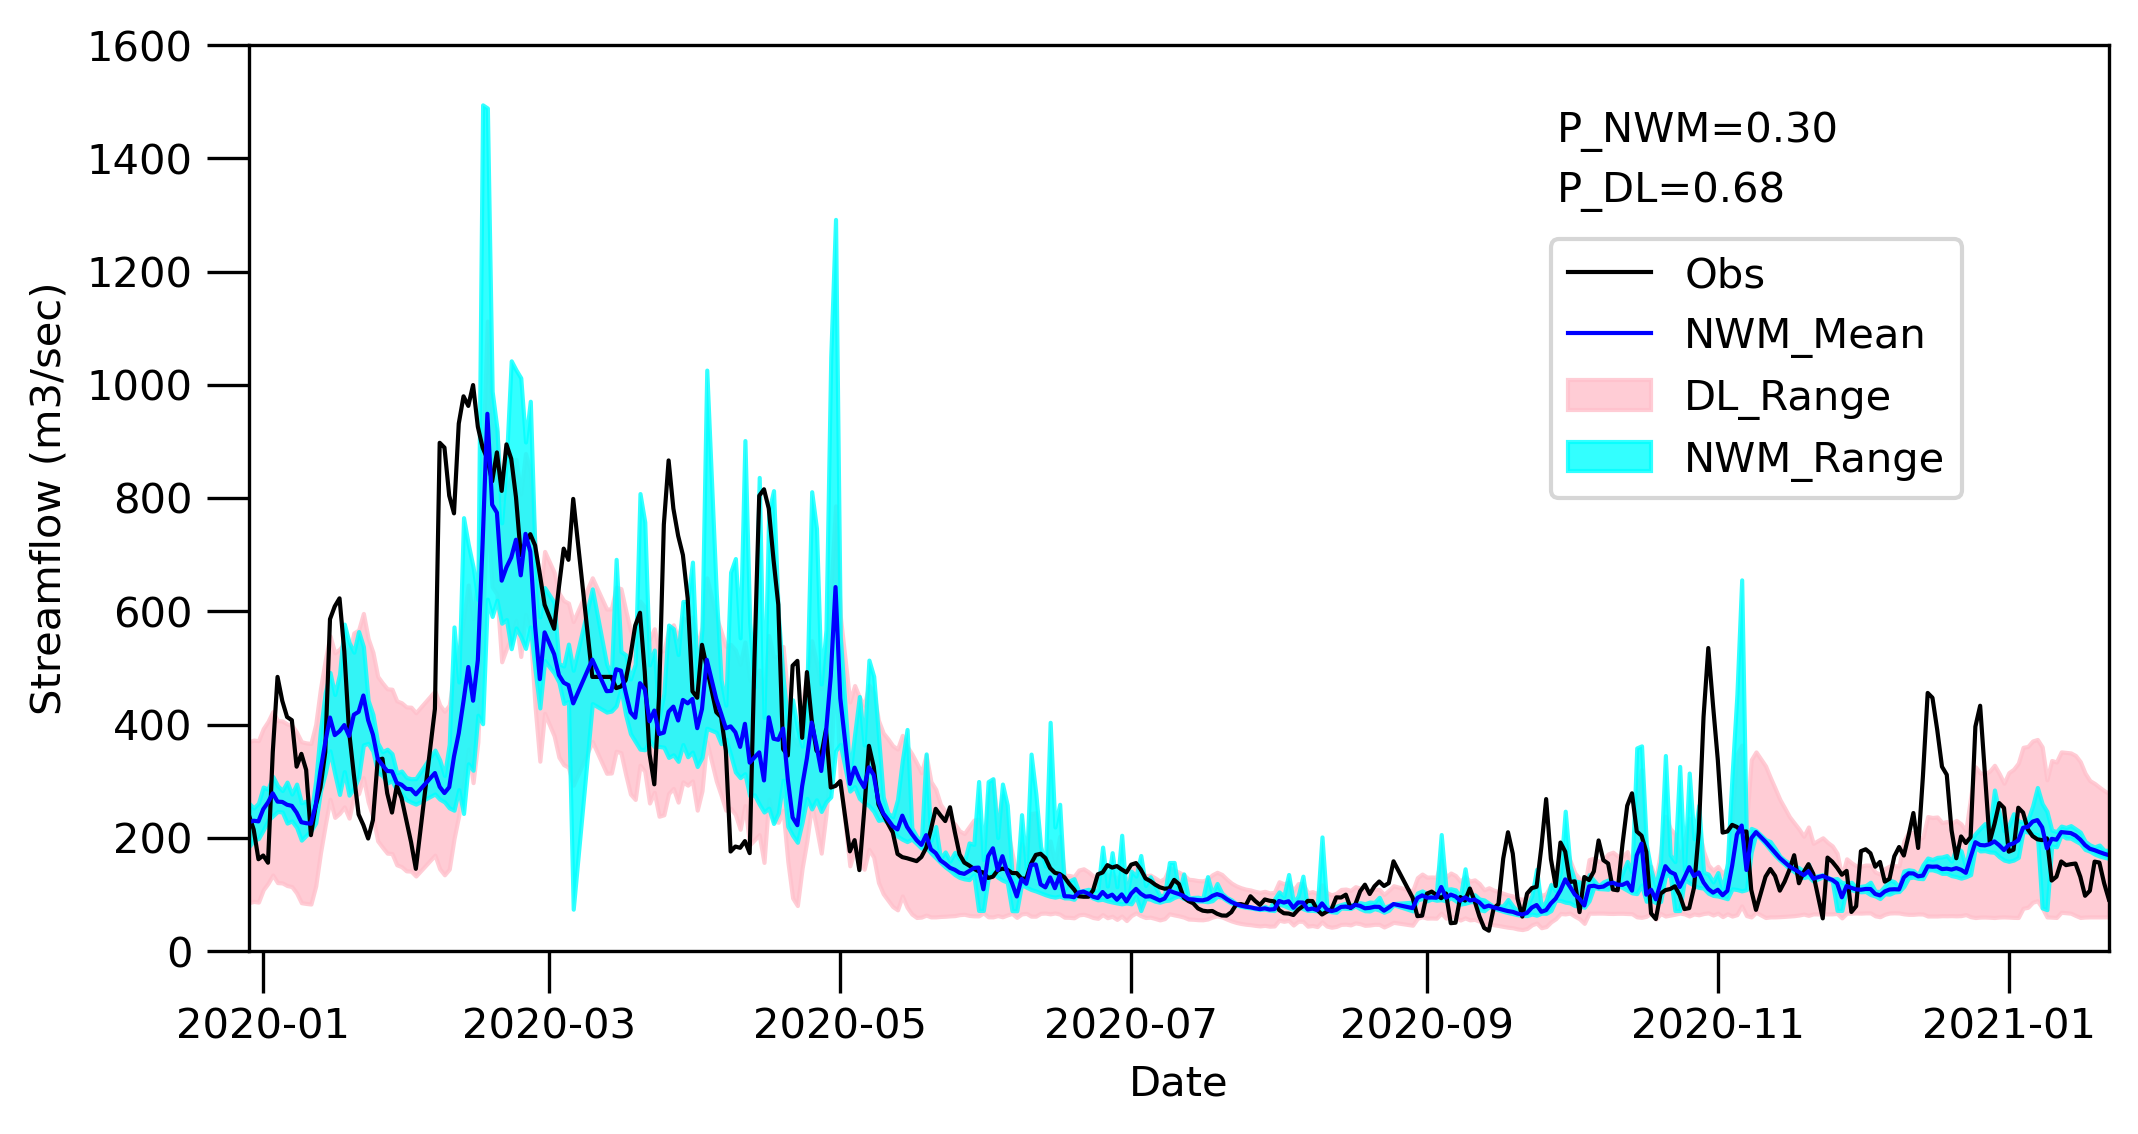

In [26]:
fig = plt.figure(figsize=(3.54,3.54), dpi=300)

plt.plot(df1['Obsflow'], 'k', linewidth=1, label='Obs',alpha=1.0)
plt.plot(df1['Modelflow'], 'b', linewidth=1, label='NWM_Mean',alpha=1.0) 
plt.fill_between(b, df1['ML_1min'],df1['ML_1max'],label='DL_Range',  color='pink', alpha=0.8)
plt.fill_between(b, df1['NWM_min'],df1['NWM_max'],label='NWM_Range',  color='cyan', alpha=0.8)

plt.legend(loc=(0.7, 0.5), fontsize=10)


plt.figtext(.67, .75, "P_DL=%.2f"%(prob_ML))
plt.figtext(.67, .8, "P_NWM=%.2f"%(prob_NWM))

fig.set_size_inches(8, 4)

plt.xlabel("TimeStamps")
plt.ylabel("Streamflow")

#plt.axhline(y=0, color='k',linewidth=2)
#plt.axvline(x=0, color='k',linewidth=2)
fig.set_size_inches(8, 4)
plt.xlabel("Date")
plt.ylabel("Streamflow (m3/sec)")


plt.tick_params(axis='x',direction='out', length=10)
plt.tick_params(axis='y',direction='out', length=10)
plt.ylim(0, 1600)
plt.xlim(df1.index[0], df1.index[374])


fig.set_facecolor('white')
#ax = plt.axes()


plt.show()


fig.savefig('fig13(a)v2.png',bbox_inches='tight')